In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

**Importing library**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

**Reading The csv file**

In [4]:
df = pd.read_csv('../input/voice.csv')
df.head()

meanfreq        sd    median  ...     dfrange   modindx  label
0  0.059781  0.064241  0.032027  ...    0.000000  0.000000   male
1  0.066009  0.067310  0.040229  ...    0.046875  0.052632   male
2  0.077316  0.083829  0.036718  ...    0.007812  0.046512   male
3  0.151228  0.072111  0.158011  ...    0.554688  0.247119   male
4  0.135120  0.079146  0.124656  ...    5.476562  0.208274   male

[5 rows x 21 columns]

All the variables given here are some sort of mathematical function it will be interesting to visualize the dataset to validate our statistical understanding

**Basic utils**

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


No null value

In [62]:
df.shape

(3168, 21)

In [63]:
df.describe()

meanfreq           sd     ...           dfrange      modindx
count  3168.000000  3168.000000     ...       3168.000000  3168.000000
mean      0.180907     0.057126     ...          4.994630     0.173752
std       0.029918     0.016652     ...          3.520039     0.119454
min       0.039363     0.018363     ...          0.000000     0.000000
25%       0.163662     0.041954     ...          2.044922     0.099766
50%       0.184838     0.059155     ...          4.945312     0.139357
75%       0.199146     0.067020     ...          6.992188     0.209183
max       0.251124     0.115273     ...         21.843750     0.932374

[8 rows x 20 columns]

**Corelation check**

In [8]:
df.corr()

meanfreq        sd    median    ...       maxdom   dfrange   modindx
meanfreq  1.000000 -0.739039  0.925445    ...     0.519528  0.515570 -0.216979
sd       -0.739039  1.000000 -0.562603    ...    -0.482278 -0.475999  0.122660
median    0.925445 -0.562603  1.000000    ...     0.438919  0.435621 -0.213298
Q25       0.911416 -0.846931  0.774922    ...     0.459683  0.454394 -0.141377
Q75       0.740997 -0.161076  0.731849    ...     0.335114  0.335648 -0.216475
IQR      -0.627605  0.874660 -0.477352    ...    -0.337877 -0.331563  0.041252
skew     -0.322327  0.314597 -0.257407    ...    -0.305651 -0.304640 -0.169325
kurt     -0.316036  0.346241 -0.243382    ...    -0.274500 -0.272729 -0.205539
sp.ent   -0.601203  0.716620 -0.502005    ...    -0.324253 -0.319054  0.198074
sfm      -0.784332  0.838086 -0.661690    ...    -0.436649 -0.431580  0.211477
mode      0.687715 -0.529150  0.677433    ...     0.477187  0.473775 -0.182344
centroid  1.000000 -0.739039  0.925445    ...     0.519528  0.515570 -0.216979
meanfun   0.460844 -0.466281  0.414909    ...     0.277982  0.275154 -0.054858
minfun    0.383937 -0.345609  0.337602    ...     0.317860  0.316486  0.002042
maxfun    0.274004 -0.129662  0.251328    ...     0.355390  0.359880 -0.363029
meandom   0.536666 -0.482726  0.455943    ...     0.812838  0.811304 -0.180954
mindom    0.229261 -0.357667  0.191169    ...     0.026640  0.008666  0.200212
maxdom    0.519528 -0.482278  0.438919    ...     1.000000  0.999838 -0.425531
dfrange   0.515570 -0.475999  0.435621    ...     0.999838  1.000000 -0.429266
modindx  -0.216979  0.122660 -0.213298    ...    -0.425531 -0.429266  1.000000

[20 rows x 20 columns]

**checking the similarity between the data**

In [9]:
print("Total number of labels: {}".format(df.shape[0]))
print("Number of male: {}".format(df[df.label == 'male'].shape[0]))
print("Number of female: {}".format(df[df.label == 'female'].shape[0]))

Total number of labels: 3168
Number of male: 1584
Number of female: 1584


Text(0.5, 1.0, 'Class Distributions \n (male || female)')

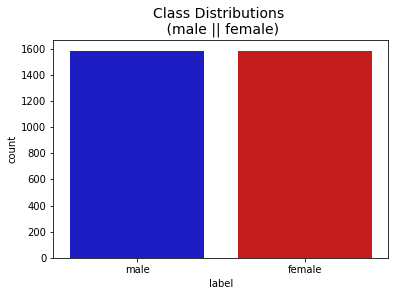

In [30]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('label', data=df, palette=colors)
plt.title('Class Distributions \n (male || female)', fontsize=14)

**Visualization of correlation**

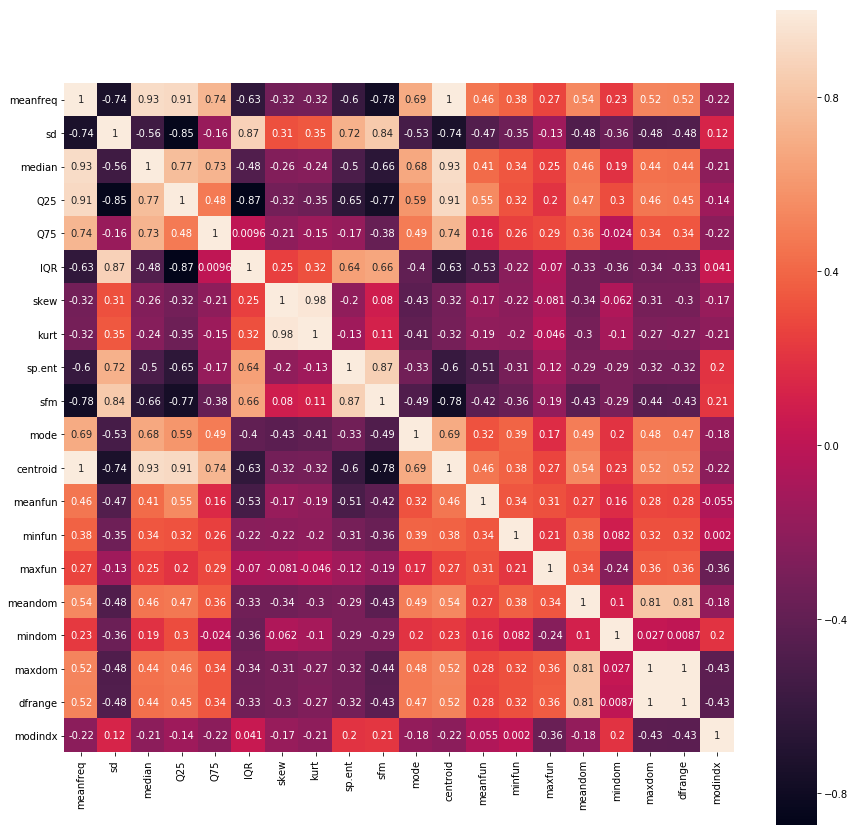

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),square=True,annot=True)

In [11]:
df.columns.values

array(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype=object)

**visualization of pairplot**

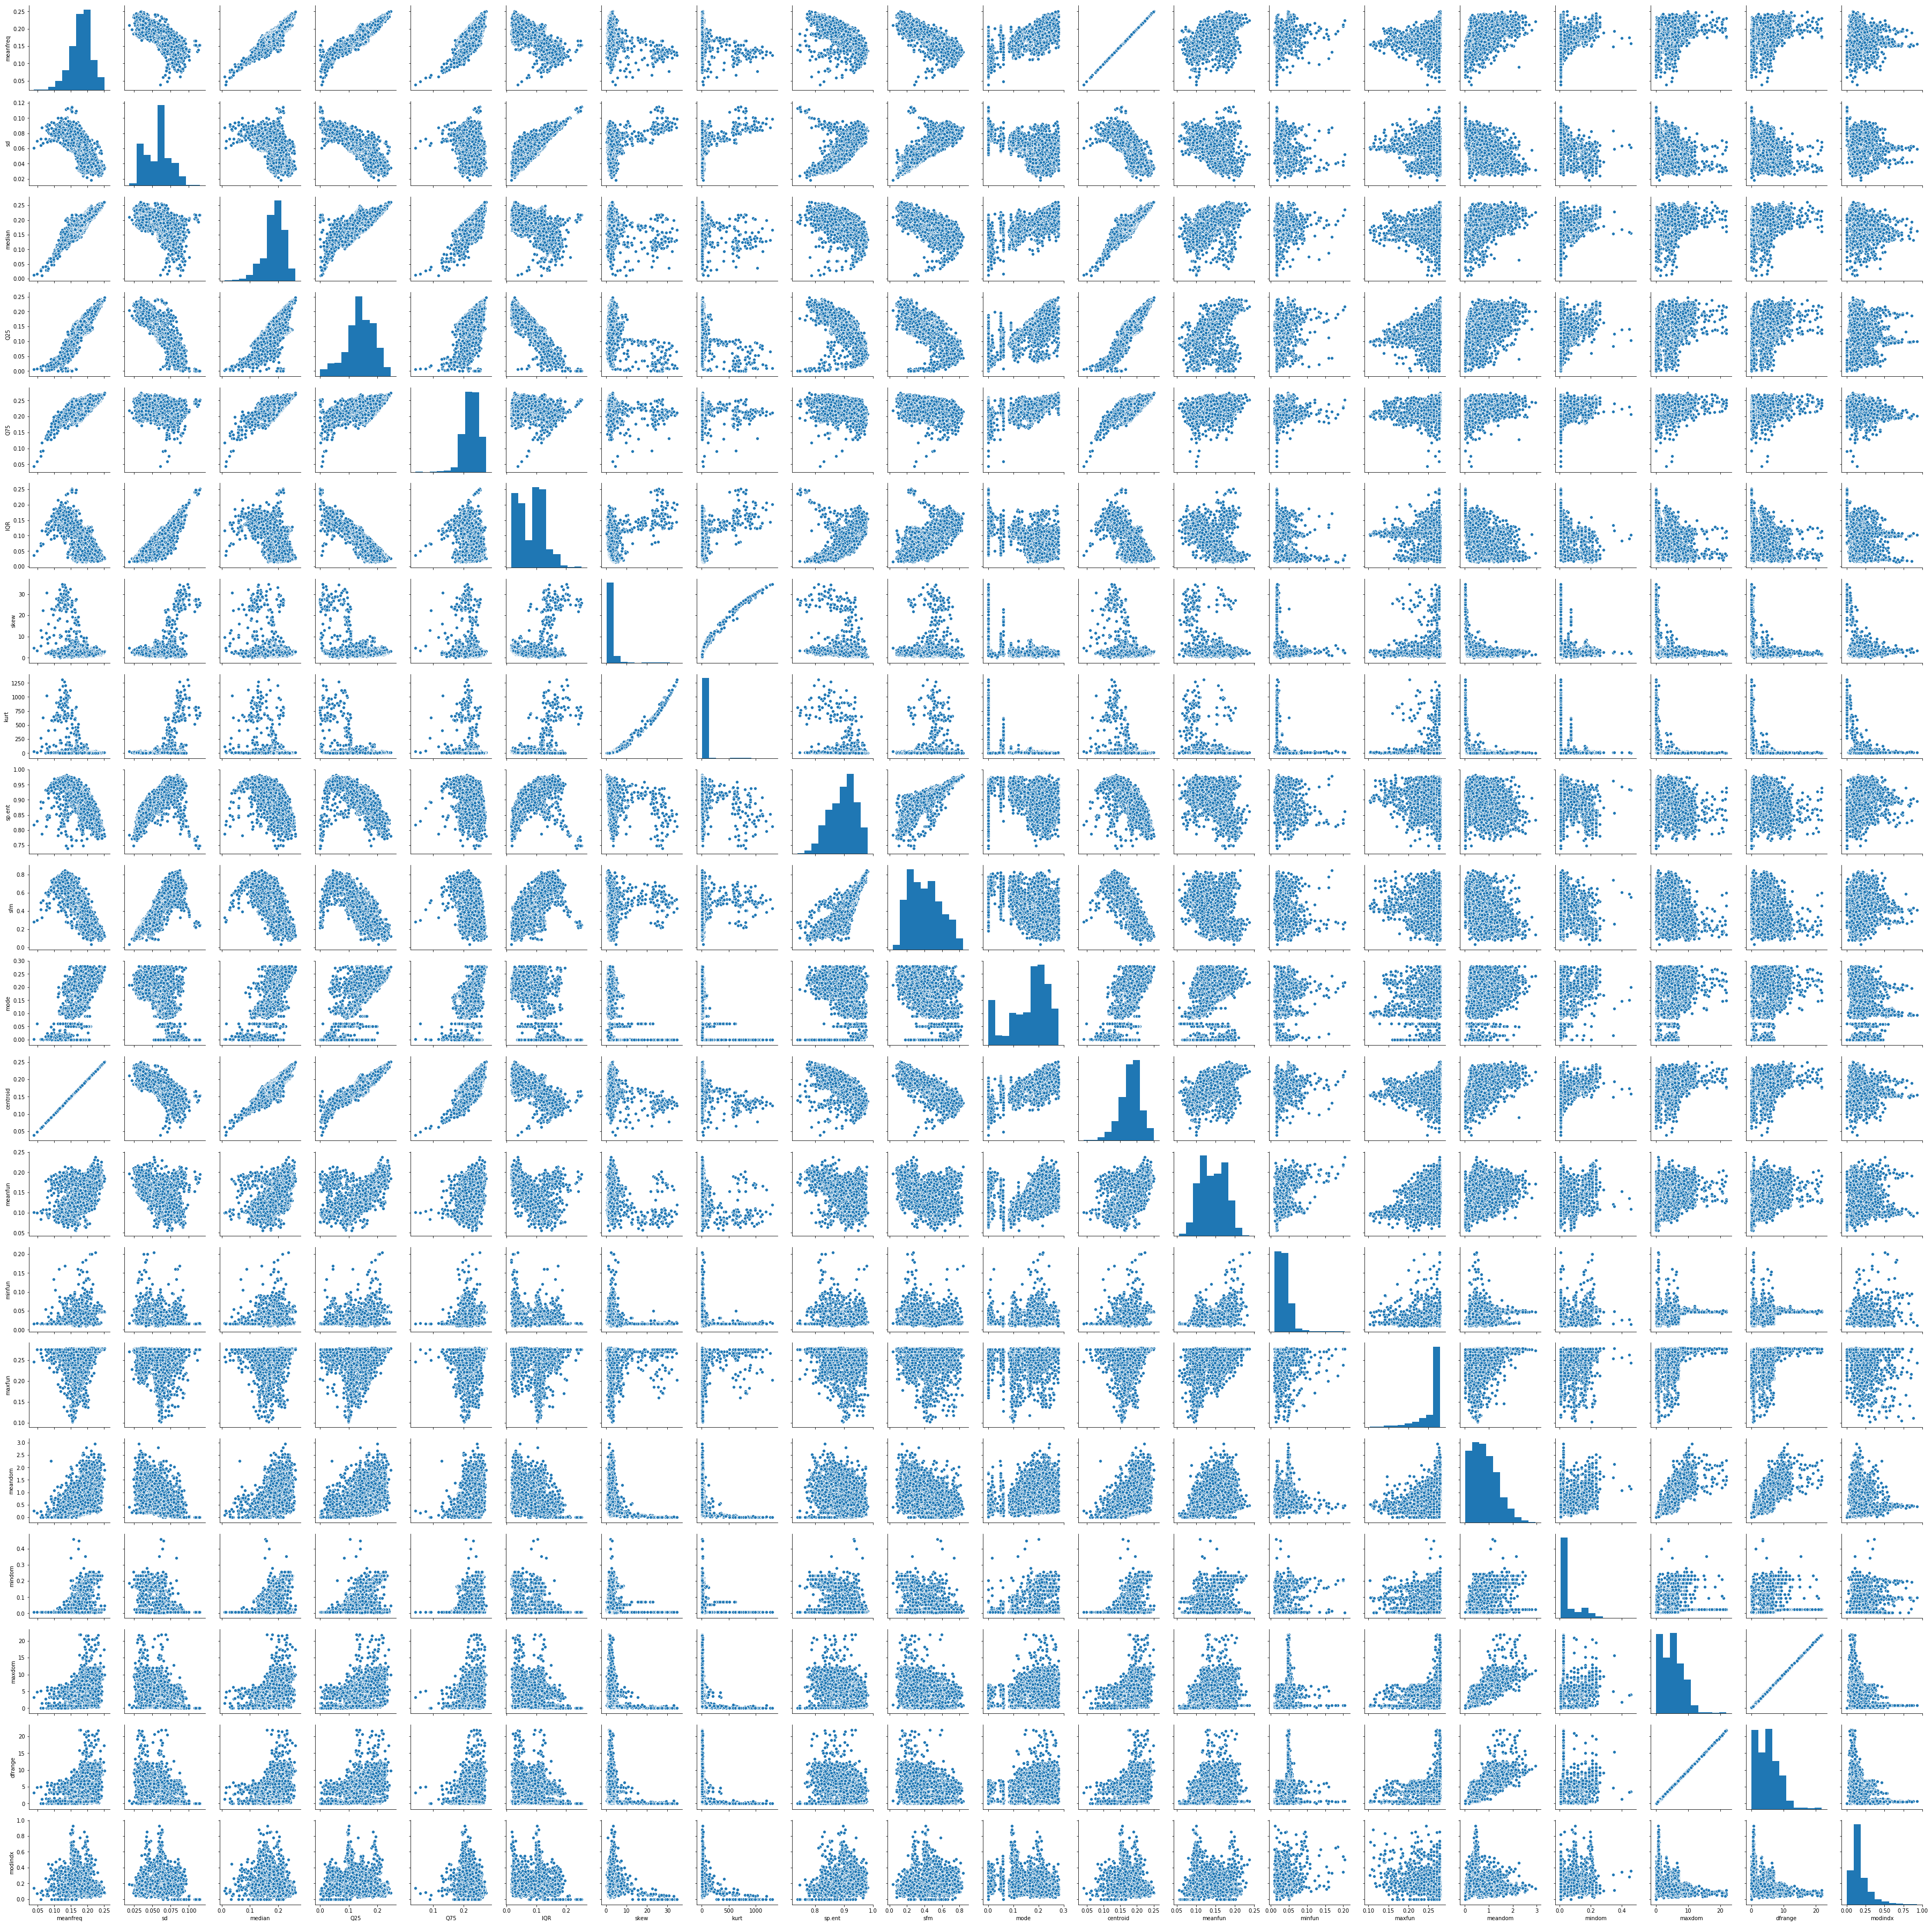

In [12]:
sns.pairplot(df)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


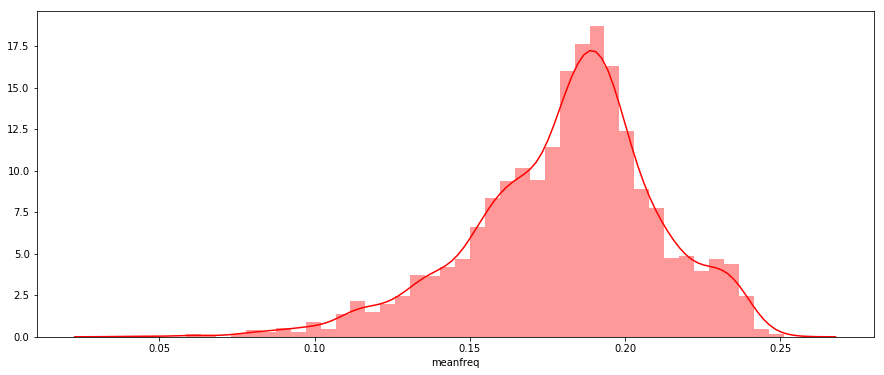

In [13]:
plt.figure(figsize=(15,6))
sns.distplot(df["meanfreq"],color="r")

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


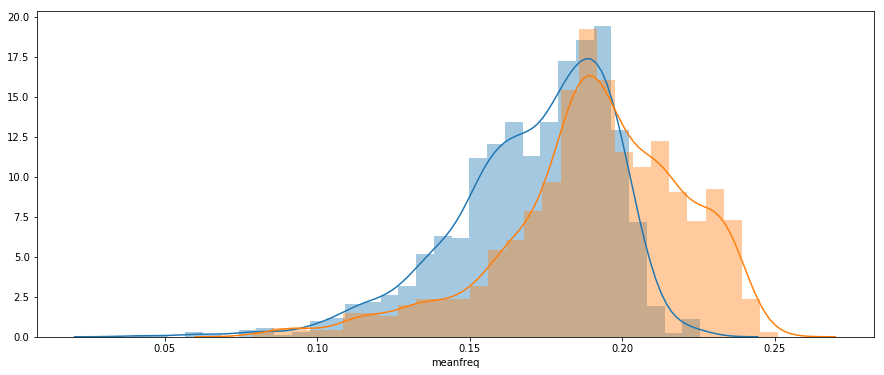

In [14]:
plt.figure(figsize=(15,6))
for i in ["male","female"]:
    
    sns.distplot(df["meanfreq"][df["label"]==i])

practically there are 2 distingush patteren already on behalf of meanfrequency you can identify

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


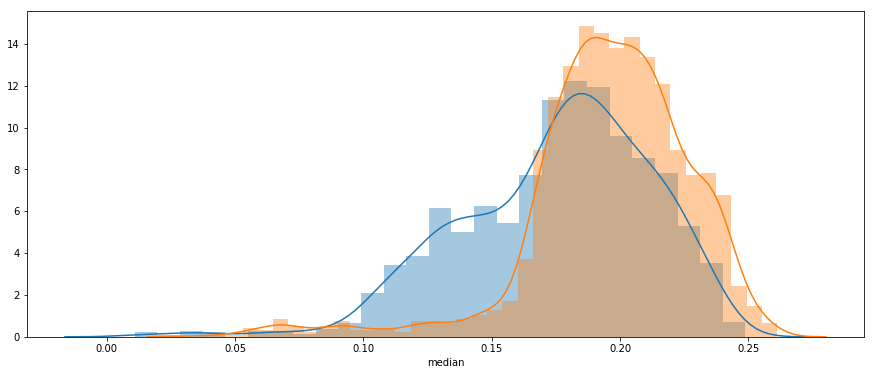

In [15]:
plt.figure(figsize=(15,6))
for i in ["male","female"]:
    
    sns.distplot(df["median"][df["label"]==i])

Not much clearer

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


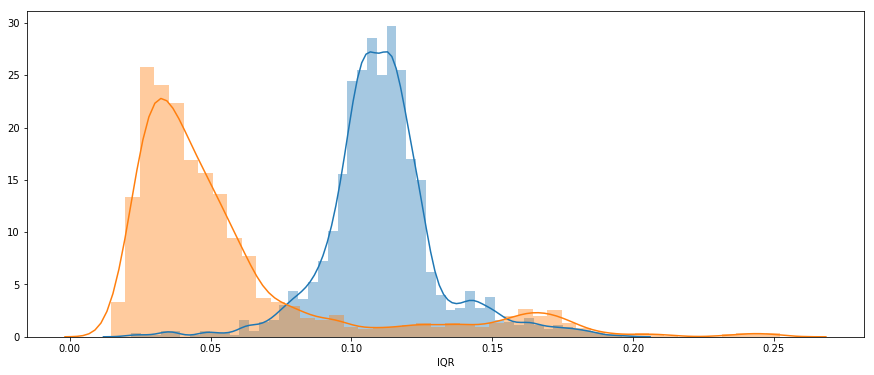

In [16]:
plt.figure(figsize=(15,6))
for i in ["male","female"]:
    
    sns.distplot(df["IQR"][df["label"]==i])

clear distribution

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


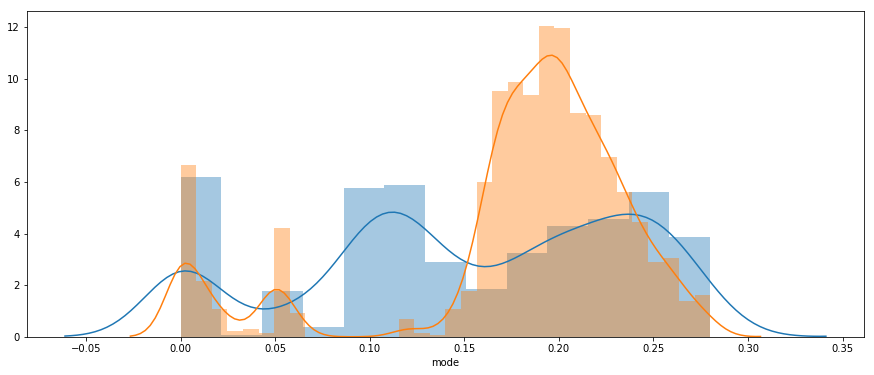

In [17]:
plt.figure(figsize=(15,6))
for i in ["male","female"]:
    
    sns.distplot(df["mode"][df["label"]==i])

IS there a relation between Q25 and Q75

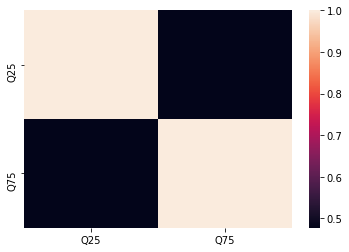

In [18]:
sns.heatmap(df[["Q25","Q75"]].corr())

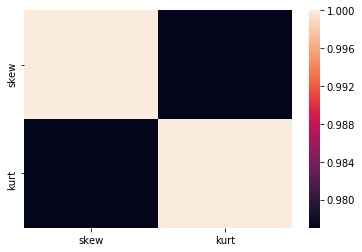

In [19]:
sns.heatmap(df[["skew","kurt"]].corr())

See a high corelation between skewness and kurtosis as expected from statistical measure 

**feature selection**

In [20]:
idx_feature=["Q25","Q75","IQR","skew","mode","centroid","meanfun","minfun","maxfun"]

In [21]:
X=df [idx_feature]
X.head()

Q25       Q75       IQR    ...      meanfun    minfun    maxfun
0  0.015071  0.090193  0.075122    ...     0.084279  0.015702  0.275862
1  0.019414  0.092666  0.073252    ...     0.107937  0.015826  0.250000
2  0.008701  0.131908  0.123207    ...     0.098706  0.015656  0.271186
3  0.096582  0.207955  0.111374    ...     0.088965  0.017798  0.250000
4  0.078720  0.206045  0.127325    ...     0.106398  0.016931  0.266667

[5 rows x 9 columns]

In [22]:
from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,-1]

# Encode label category
# male -> 1
# female -> 0

gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)

In [23]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [25]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9763406940063092


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [26]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9700315457413249


In [27]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9763406940063092


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [28]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy Score:
0.9621451104100947


In [29]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.90880503 0.96540881 0.97798742 0.9591195  0.96202532 0.99367089
 0.99367089 0.98734177 0.93987342 0.99683544]


In [31]:
print(scores.mean())

0.9684738476235968


In [32]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

[0.91194969 0.96855346 0.96855346 0.94339623 0.9556962  1.
 0.98101266 0.97151899 0.9335443  0.99050633]


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [33]:
print(scores.mean())

0.9624731311201338


In [34]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)   

[0.9684738476235968, 0.9687903033197994, 0.9687883130324018, 0.9684738476235968, 0.9684738476235968, 0.9684738476235968, 0.9687883130324018, 0.9684738476235968, 0.9684738476235968, 0.9684738476235968, 0.9684738476235968, 0.9687903033197994, 0.9684738476235968, 0.9687903033197994, 0.9687903033197994, 0.9687903033197994, 0.9687903033197994, 0.9687903033197994, 0.9687903033197994, 0.9687903033197994, 0.9687903033197994, 0.9687903033197994, 0.9687903033197994, 0.9687903033197994, 0.9684738476235968]


Text(0, 0.5, 'Cross-Validated Accuracy')

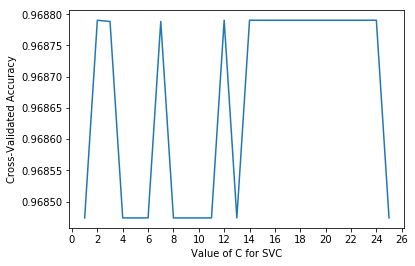

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline


C_values=list(range(1,26))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [36]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9697356898336119, 0.970364620651222, 0.9700501552424171, 0.9694192341374095, 0.9694212244248069, 0.9694212244248069, 0.9694192341374095, 0.9687883130324018, 0.9687883130324018, 0.9684738476235968, 0.9684738476235968, 0.9681593822147917, 0.9687883130324018, 0.9687883130324018, 0.9687903033197994, 0.9687903033197994, 0.9687903033197994, 0.9687903033197994, 0.9687903033197994, 0.9687903033197994, 0.9687903033197994, 0.9687903033197994, 0.9687903033197994, 0.9687903033197994, 0.9691047687286044, 0.9687903033197994, 0.9684738476235968, 0.9684738476235968, 0.9687883130324018, 0.9687883130324018, 0.9684738476235968, 0.9684738476235968, 0.9684738476235968, 0.9684738476235968, 0.9684738476235968, 0.9684738476235968, 0.9684738476235968, 0.9684738476235968, 0.9684738476235968, 0.9684738476235968, 0.9684738476235968, 0.9684738476235968, 0.9684738476235968, 0.9684738476235968, 0.9684738476235968, 0.9684738476235968, 0.9684738476235968, 0.9684738476235968, 0.9684738476235968, 0.9684738476235968, 

Text(0, 0.5, 'Cross-Validated Accuracy')

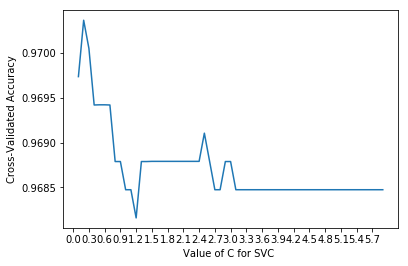

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

C_values=list(np.arange(0.1,6,0.1))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0.0,6,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [38]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9114481331104212, 0.9555668338508079, 0.9684778281983919, 0.9694252049996018, 0.9539726136454105, 0.8022948013693177, 0.5867008996099037]


Text(0, 0.5, 'Cross-Validated Accuracy')

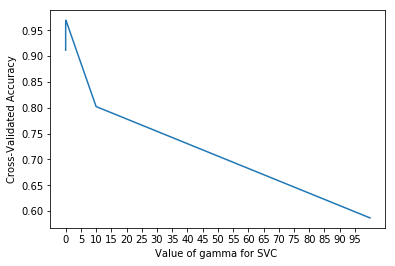

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

In [40]:
gamma_range=[0.0001,0.001,0.01,0.1]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[0.9114481331104212, 0.9555668338508079, 0.9684778281983919, 0.9694252049996018]


Text(0, 0.5, 'Cross-Validated Accuracy')

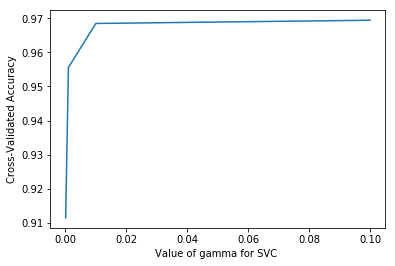

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [42]:
gamma_range=[0.01,0.02,0.03,0.04,0.05]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score) 

[0.9684778281983919, 0.9684758379109943, 0.9678469070933844, 0.9675324416845793, 0.969110739590797]


Text(0, 0.5, 'Cross-Validated Accuracy')

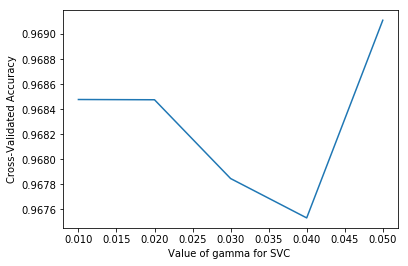

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.01,0.02,0.03,0.04,0.05]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [44]:
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)   

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

[0.8182409839980893, 0.9624731311201338, 0.82551747472335, 0.886129687126821, 0.7585801289706234]


Text(0, 0.5, 'Cross-Validated Accuracy')

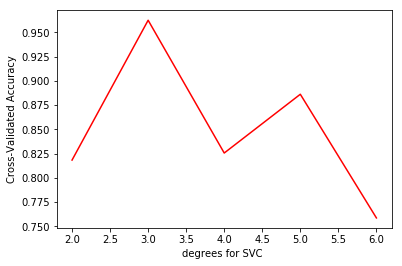

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

degree=[2,3,4,5,6]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [46]:
from sklearn.svm import SVC
svc= SVC(kernel='linear',C=0.1)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

0.9700315457413249


In [48]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear',C=0.1)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)

[0.91194969 0.96855346 0.97484277 0.96226415 0.96202532 0.99367089
 0.99050633 0.98417722 0.95253165 0.99683544]


In [49]:
print(scores.mean())

0.9697356898336119


In [50]:
from sklearn.svm import SVC
svc= SVC(kernel='rbf',gamma=0.01)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
metrics.accuracy_score(y_test,y_predict)

0.9684542586750788

In [51]:
svc=SVC(kernel='linear',gamma=0.01)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.90880503 0.96540881 0.97798742 0.9591195  0.96202532 0.99367089
 0.99367089 0.98734177 0.93987342 0.99683544]
0.9684738476235968


In [52]:
from sklearn.svm import SVC
svc= SVC(kernel='poly',degree=3)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

0.9621451104100947


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [53]:
svc=SVC(kernel='poly',degree=3)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

[0.91194969 0.96855346 0.96855346 0.94339623 0.9556962  1.
 0.98101266 0.97151899 0.9335443  0.99050633]
0.9624731311201338


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [54]:
from sklearn.svm import SVC
svm_model= SVC()

In [55]:
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }

In [57]:
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [58]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

0.9648776637726914


In [59]:
print(model_svm.best_params_)

{'C': 0.30000000000000004, 'degree': 3, 'gamma': 0.03, 'kernel': 'poly'}


In [60]:
y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

0.9463722397476341
